In [16]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

data=pd.read_csv("Iris.csv")
data["Species"]=data["Species"].replace("Iris-setosa",1)
data["Species"]=data["Species"].replace("Iris-versicolor",2)
data["Species"]=data["Species"].replace("Iris-virginica",3)




<ipython-input-16-7f6da960fa3f>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Species"]=data["Species"].replace("Iris-virginica",3)


In [29]:

data=data.sample(frac=1).reset_index(drop=True)

train_data = data.iloc[:100, :]
test_data = data.iloc[100:, :]
xtrain=train_data.iloc[:, 1:-1].values
ytrain=train_data.iloc[:, -1].values.reshape(-1,1)
xtest=test_data.iloc[:, 1:-1].values
ytest=test_data.iloc[:, -1].values.reshape(-1,1)

print(ytest.shape)
print(train_data.head)

(50, 1)
<bound method NDFrame.head of      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   110            7.2           3.6            6.1           2.5        3
1   118            7.7           3.8            6.7           2.2        3
2     8            5.0           3.4            1.5           0.2        1
3   109            6.7           2.5            5.8           1.8        3
4    30            4.7           3.2            1.6           0.2        1
..  ...            ...           ...            ...           ...      ...
95   42            4.5           2.3            1.3           0.3        1
96   23            4.6           3.6            1.0           0.2        1
97   28            5.2           3.5            1.5           0.2        1
98   43            4.4           3.2            1.3           0.2        1
99  149            6.2           3.4            5.4           2.3        3

[100 rows x 6 columns]>


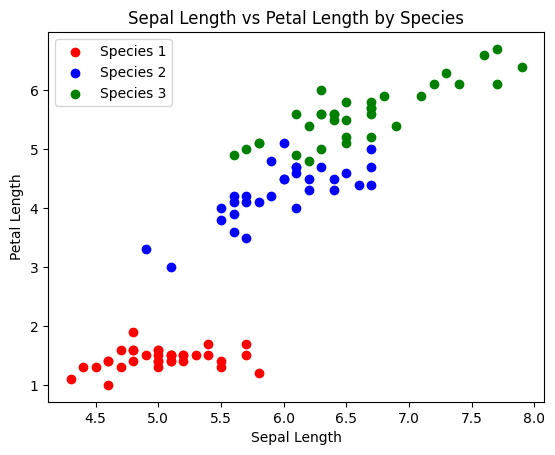

In [30]:

import matplotlib.pyplot as plt
xtrain1 = xtrain[ytrain[:,0]==1]
xtrain2 = xtrain[ytrain[:,0]==2]
xtrain3 = xtrain[ytrain[:,0]==3]

plt.scatter(xtrain1[:,0], xtrain1[:,2], c='red', label='Species 1')
plt.scatter(xtrain2[:,0], xtrain2[:,2], c='blue', label='Species 2')
plt.scatter(xtrain3[:,0], xtrain3[:,2], c='green', label='Species 3')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length by Species')
plt.legend()
plt.show()

In [34]:
class node():
  def __init__(self,feature_id=None,threshold=None,left=None,right=None,info_gain=None,value=None):
    self.feature_id=feature_id
    self.threshold=threshold
    self.left=left
    self.right=right
    self.info_gain=info_gain
    #for leaf node:
    self.value=value


class Decision_tree():
  def __init__(self,min_split=2,max_depth=4):

    self.root=None

    self.min_split=min_split
    self.max_depth=max_depth

  def build_tree(self,dataset,cur_depth=0):
    X,Y=dataset[:,:-1],dataset[:,-1:]
    n_samples,n_features=len(X),len(X[0])

    if(cur_depth<=self.max_depth) and (n_samples>=self.min_split):
      split=self.get_split(dataset,n_features,n_samples)

      if(split["info gain"]>0):

        left =self.build_tree(split["left"],cur_depth+1)
        right=self.build_tree(split["right"],cur_depth+1)

        return node(split["feature id"],split["threshold"],left,right,split["info gain"])
    #for leaf node
    val=self.get_leafval(Y)

    return node(value=val)

  def get_split(self,dataset,n_f,n_s):
    split={}
    max_gain=-1
    for i in range(n_f):
      values=dataset[:,i]
      psbl_thresholds=np.unique(values)
      for threshold in psbl_thresholds:
        left,right=self.split(dataset,threshold,i)
        if(len(left)>0 and len(right)>0):
          y,y_left,y_right=dataset[:,-1],left[:,-1],right[:,-1]
          info_gain=self.information_gain(y,y_left,y_right)

          if(info_gain>max_gain):
            max_gain=info_gain
            split["left"]=left
            split["right"]=right
            split["threshold"]=threshold
            split["info gain"]=info_gain
            split["feature id"]=i

    return split

  def split(self,dataset,th,id):
    left=[]
    right=[]

    for row in dataset:
      if(row[id]<=th):
        left.append(row)
      else:
        right.append(row)
    return np.array(left),np.array(right)

  def information_gain(self,y,y_left,y_right):
    wl=len(y_left)/len(y)
    wr=len(y_right)/len(y)

    inf_gain= self.entropy(y)-(wl*self.entropy(y_left)+wr*self.entropy(y_right))
    return inf_gain

  def entropy(self,y):
    unq_classes=np.unique(y)
    ent=0
    for cls in unq_classes:
      prb_cls=len(y[y==cls])/len(y)

      ent+=-(prb_cls*np.log2(prb_cls))
    return ent

  def get_leafval(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)

  def print_tree(self, tree=None, indent=" "):

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_id), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)



  def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

  def predict(self, X):

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

  def make_prediction(self, x, tree):

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_id]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)









In [35]:
decisiontree_classifier=Decision_tree(min_split=2,max_depth=8)
decisiontree_classifier.fit(xtrain,ytrain)
decisiontree_classifier.print_tree()

X_2 <= 1.9 ? 0.9340680553754911
 left:[1.]
 right:X_3 <= 1.7 ? 0.8002767262296111
  left:X_2 <= 5.1 ? 0.205592508185083
    left:[2.]
    right:[3.]
  right:X_2 <= 4.8 ? 0.1326097254024287
    left:X_0 <= 5.9 ? 1.0
        left:[2.]
        right:[3.]
    right:[3.]


In [36]:
ypred=decisiontree_classifier.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.94